# Clase 7

## Contenidos


Introducción a:    
    
* Árboles filogenéticos
* Algoritmo UPGMA
* Implementación en Python

## Árboles filogenéticos 

En la unidad anterior consideramos el problema de alineamiento entre secuencias genéticas. Ahora veremos como utilizar esa información para inferir relaciones filogenéticas. 

La similiaridad de los mecanismos moleculares presentes en los organismos vivos sugiere que todos comparten un antepasado común. Así, todas las especies están relacionadas, y está relación se llama filogénia. Estas pueden ser representadas con un árbol filogenético.
    
<img src="https://raw.githubusercontent.com/mrivas/Bioinformatica/master/clase12_phylogeneticTree.png" alt="Drawing" style="width: 400px;"/>  

Tradicionalmente, la relaciones filogenéticas se inferían a partir de las características morfológicas de los organismos. 

Con el desarrollo de las técnicas de secuenciamiento genético, ahora podemos inferir estás relaciones analizando la similaridad del material genéticos de los organismos. 

Por ejemplo, es plausible asumir que dos secuencias que derivan de un atenpasado común tendrán más diferencias (peor alineamiento) a medida que el aumento el tiempo desde el evento de diversificación. 

## Algoritmo UPGMA

    
Una manera intuitiva de construir arboles filogenéticos es considerar las distancias $d_{i,j}$ entre las secuencias $i$ y $j$. 

Hay muchas maneras de definir $d_{i,j}$. 

Por ejemplo, como la fracción $f$ de sitios en los cuales difieren las secuencias $i$ y $j$. 

Sin embargo, hay que tener en consideración la fracción $f$ que se obtendría aleatoriamente entre dos secuencias totalmente no relacionadas. 

En este caso el valor de $f$ sería $3/4$. 

Teniendo ésto en consideración, una definición de distancia más adecuada sería una que se tiende a infinito a medida que $f$ tiende a $3/4$. Una manera de implementar esto es la a través de la distancia de Jukes-Cantor:
    
$d_{i,j} = -\frac{3}{4}log(1-f\frac{4}{3})$    


Text(0.5, 1.0, 'Distancia de Jukes-Cantor')

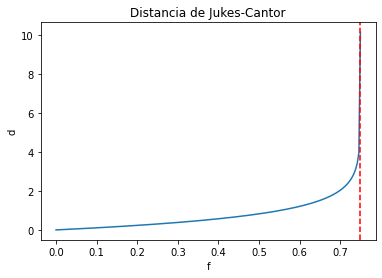

In [3]:
import numpy as np
from matplotlib import pyplot as plt

f=np.linspace(0,0.749999,200)
d=-3/4*np.log(1-f*4/3)

plt.plot(f,d)
plt.xlabel("f")
plt.ylabel("d")
plt.axvline(0.75,color="red",linestyle="--")
plt.title("Distancia de Jukes-Cantor")

# <font size="5">
La distancia entre secuencias también la podemos extender a las distancias entre clusters como la distancia promedio entre los pares de secuencias contenidos en cada cluster:

\begin{equation}    
d_{i,j} = \frac{1}{|C_i||C_j|} \sum_{p \in C_i, q \in C_j}d_{p,q}
\end{equation}   
    
donde: 
    
$|C_i|$ y $|C_j|$ son el número de secuencias en los clusters $i$ y $j$.
    
    
Notar que si $C_k$ es la unión de dos clusters, $C_i$ y $C_j$, entonces $C_k=C_i \cup C_j$, y su distancia con el cluter $l$ es:
    
\begin{equation}    
d_{k,l} = \frac{d_{i,l}|C_i|+d_{j,l}|C_j|}{|C_i|+|C_j|}
\end{equation}       
</font>

Así, el algoritmo es el siguiente:
    
1. Inicialización
    * Por cada secuencia $i$ define un cluser $C_i$.
    * Define una hoja por cada secuencia y asignale una altura zero.
2. Iteración:
    * Determina los dos clusters $i$ y $j$ para los cuales $d_{i,j}$ es mínima (si hay más de dos, selecionalos aleatoriamente).
    * Define un nuevo cluster $k$ como $C_k=C_i \cup C_j$.
    * Define un nodo $k$ con nodos hijos $i$ y $j$ y asignale una altura de $d_{i,j}/2$.
    * Agregar $k$ al conjunto de clusters y remueve $i$ y $j$ de los clusters.
3. Término:
    * Cuando solo queden dos clusters, $i$ y $j$, ubicalos como como nodo raíz con una altura de $d_{i,j}/2$.
 
</font>  

<img src="https://raw.githubusercontent.com/mrivas/Bioinformatica/master/clase12_UPGMA.jpg" alt="Drawing" style="width: 600px;"/> 
    
  

Implementación en Python
---------------------

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

d = np.array([[0,1,3],[1,0,3],[3,3,0]]) # matriz de distancias
d

array([[0, 1, 3],
       [1, 0, 3],
       [3, 3, 0]])

<ipython-input-5-2d50a625baeb>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(d, 'average')


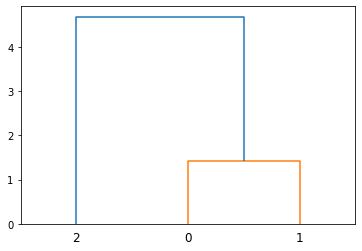

In [5]:
Z = linkage(d, 'average')
dn = dendrogram(Z)

Ejercicio
--------

Realiza el dendrograma de la siguiente matriz de distancias:
    
```
d = np.array([[0,1,6,5,5],[1,0,6,5,5],[6,6,0,3,5],[5,5,3,0,1.1],[5,5,5,1.1,0]])
```

Ejercicio
--------

Dadas las siguintes secuencias:

```
seq1="CGGGCATAACGTAGAGGGCAGGCATAACGAAGGAGGTAGGCA"
seq2="CGGGCTTAACGTAGAGGGCAGGCATAACGAAGGAGGTAGGCA"
seq3="CGGGCTTAACGTAGAGCGCAGGCATCACGAAGGGGGTAGGCA"
seq4="CGAGCTTAACGTAGAGCGCAGTCATCACGAAGGGGGTAGGCA"
seq5="CGCGCTTAACGTAGAGCGCAGTCATCACGAAGCCGGTAGGCT"
```

1. Escribe un programa para calcular las distancias entre cada par de secuencias.
2. Computa la matriz de distancias
3. Haz el dendrograma de acuerdo al algoritmo de UPGMA.

## Tarea OBLIGATORIA

En la próxima clase usaremos un supercomputador de Amazon Web Services. 

Para conectarse al supercomputador usaremos la herramienta [SSH](https://en.wikipedia.org/wiki/Secure_Shell). 

Si estás trabajando desde:

* Linux o Mac, ya tienes SSH instalado.
* Windows, necesitas instalar [Cygwin](https://www.cygwin.com/).